<a href="https://colab.research.google.com/github/AlanEbenezer/Project-Folder/blob/main/Spotify_Danceability_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
Spotify_music_data = pd.read_csv('dataset.csv')

<ipython-input-4-14fc2990d910>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Spotify_music_data = pd.read_csv('dataset.csv')


In [5]:
Spotify_music_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [6]:
Spotify_music_data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,1
popularity,1
duration_ms,1
explicit,1
danceability,1
energy,1


In [7]:
Spotify_music_data.dropna(inplace=True)

In [8]:
Spotify_music_data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [9]:
Spotify_music_data.duplicated().sum()

0

In [10]:
pop_data = Spotify_music_data[['popularity','duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
p_train, predictors_test, t_train, target_test = train_test_split(
  pop_data.drop(['danceability'], axis=1), pop_data["danceability"],
   test_size=0.25,
  random_state=123
)

In [13]:
p_train


,popularity,duration_ms,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
14853,48.0,73773.0,0.6320,5.0,-6.625,1.0,0.1020,0.930000,0.831000,0.1280,0.8320,128.021,4.0
22591,23.0,196986.0,0.9890,0.0,-4.099,1.0,0.1510,0.000023,0.000813,0.8530,0.1140,93.343,4.0
28904,46.0,212800.0,0.6550,2.0,-2.737,1.0,0.0816,0.165000,0.001790,0.1150,0.3160,149.999,4.0
2660,55.0,327000.0,0.5350,3.0,-6.892,1.0,0.0393,0.035500,0.000000,0.0977,0.3160,143.949,4.0
36537,34.0,232173.0,0.5920,7.0,-6.502,1.0,0.0386,0.036500,0.000000,0.2800,0.1290,74.967,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,64.0,126642.0,0.2440,2.0,-14.386,0.0,0.0433,0.754000,0.000186,0.1650,0.3430,92.472,4.0
17730,18.0,200125.0,0.0265,1.0,-15.997,0.0,0.0425,0.849000,0.285000,0.1680,0.0771,120.835,1.0
28030,58.0,241411.0,0.6340,9.0,-7.689,1.0,0.0538,0.000904,0.000000,0.1310,0.1050,170.213,4.0
15725,58.0,219065.0,0.3640,5.0,-9.184,0.0,0.0606,0.902000,0.000081,0.1010,0.3720,135.939,4.0


In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [30]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'XG': XGBRegressor(),
    'LGBM': LGBMRegressor()

}

In [31]:
mae_results = {}
r2_results = {}
results = {}

In [32]:
for name, model in models.items():
    cv_scores = cross_val_score(model, p_train, t_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)


    model.fit(p_train, t_train)
    predictions = model.predict(p_train)


    mae = mean_absolute_error(t_train, predictions)
    r2 = r2_score(t_train, predictions)
    results[name] = rmse_scores
    mae_results[name] = mae
    r2_results[name] = r2

    print(f"{name} - RMSE: {rmse_scores.mean()} -Standart Deviation: {rmse_scores.std()}")
    print(f"{name} - MAE: {mae:.2f} - R²: {r2:.2f}")

Linear Regression - RMSE: 0.14249358191938807 -Standart Deviation: 0.0007191053931651968
Linear Regression - MAE: 0.11 - R²: 0.34
Ridge - RMSE: 0.1424935689959721 -Standart Deviation: 0.0007174667135644971
Ridge - MAE: 0.11 - R²: 0.34
Lasso - RMSE: 0.1751911396891576 -Standart Deviation: 0.0008430296581967357
Lasso - MAE: 0.14 - R²: 0.00
XG - RMSE: 0.10259564366685718 -Standart Deviation: 0.0008915436012548283
XG - MAE: 0.06 - R²: 0.78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2406
[LightGBM] [Info] Number of data points in the train set: 32271, number of used features: 13
[LightGBM] [Info] Start training from score 0.566289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

In [27]:
colors = sns.color_palette('rocket', n_colors=len(models))
colors2 = sns.color_palette('PuBu', n_colors=len(models))
colors3 = sns.color_palette('pastel', n_colors=len(models))

Text(0.5, 1.0, 'R² Scores for Different Models')

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

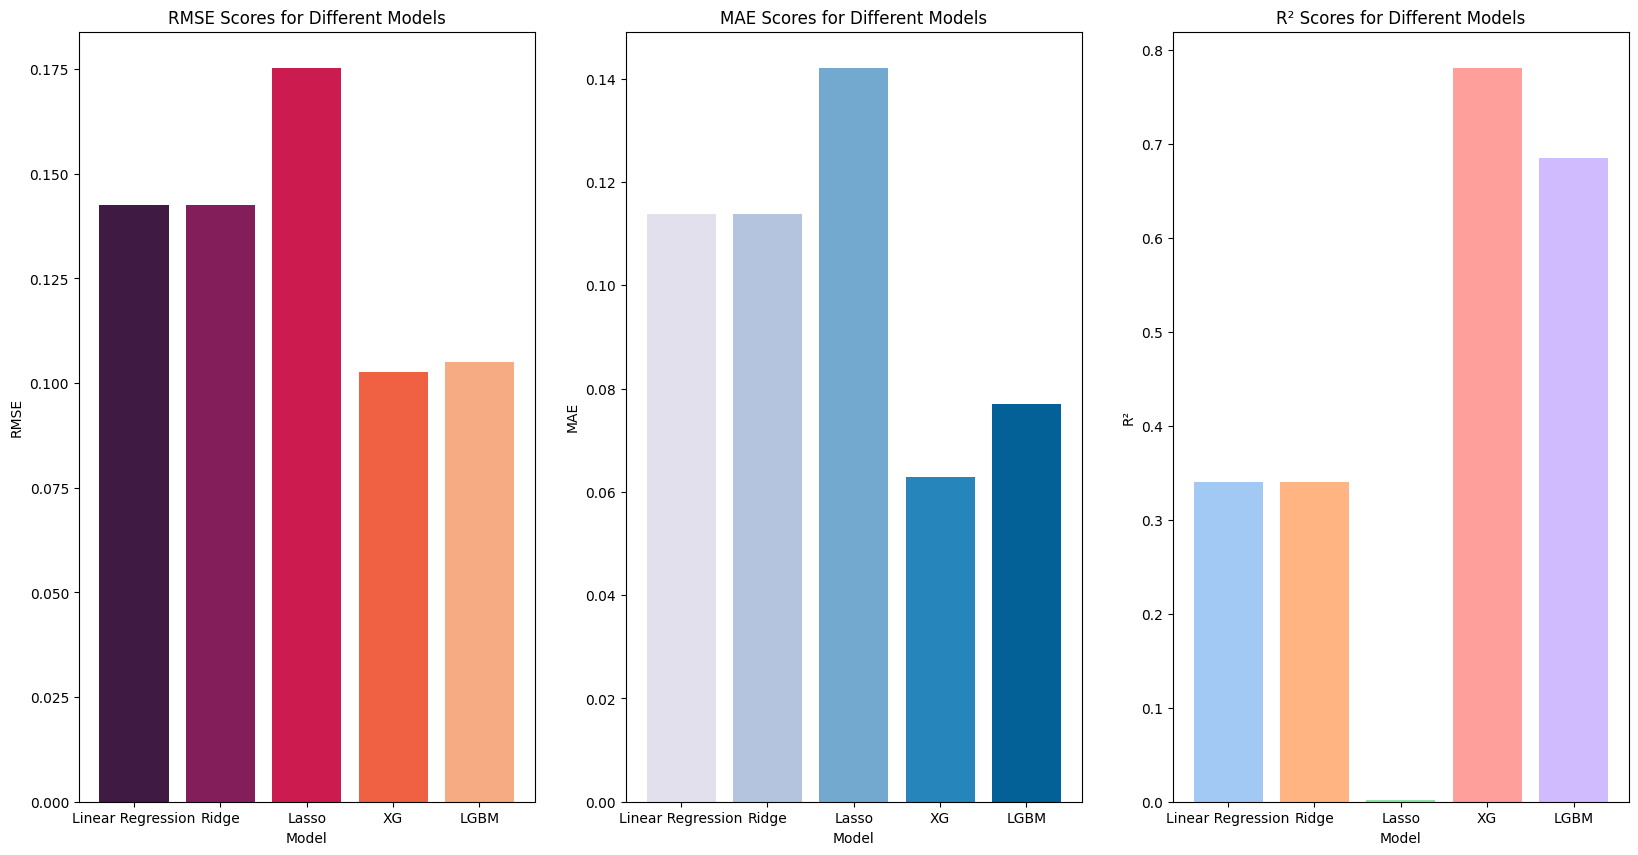

In [28]:
#compare models with graph
fig, axes = plt.subplots(1,3, figsize=(20,10))
model_names = list(results.keys())
rmse_scores = [np.mean(scores) for scores in results.values()]
mae_scores = [np.mean(scores) for scores in mae_results.values()]
r2_scores = [np.mean(scores) for scores in r2_results.values()]

plt.figure(figsize=(10, 6))
axes[0].bar(model_names, rmse_scores, color = colors)
plt.sca(axes[0])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Scores for Different Models')



plt.figure(figsize=(10, 6))
axes[1].bar(model_names, mae_scores, color=colors2)
plt.sca(axes[1])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Scores for Different Models')


axes[2].bar(model_names, r2_scores, color =colors3)
plt.sca(axes[2])
plt.xlabel('Model')
plt.ylabel('R²')
plt.title('R² Scores for Different Models')

